### TEMPLATE MATCHING

En este trabajo práctico se busca la identificación de objetos a través de diferentes algoritmos, entre ellos __template matchin__. 

In [39]:
#Import libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.stats as st
from PIL import Image

#%matplotlib


### Ejercicio 1

### Detección del logo en cada imagen

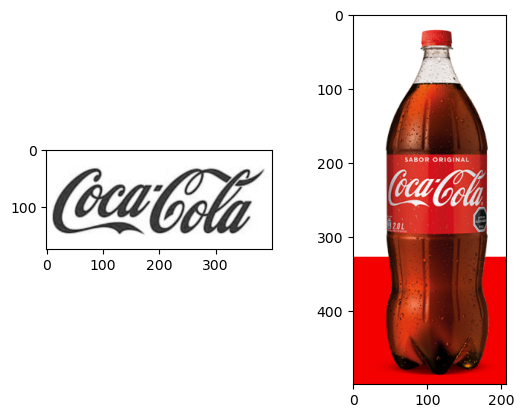

In [40]:
#Reading image
img_pattern = cv.imread('./imgs/tp3/template/pattern.png', 0)
img_pattern_gray = cv.imread('./imgs/tp3/template/pattern.png', cv.COLOR_BGR2GRAY)
#Image to process
img_1 = cv.imread('./imgs/tp3/images/coca_logo_1.png', cv.COLOR_BGR2RGB)
img_coca_logo_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_coca_logo_1_gray = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)
img_coca_logo_2 = cv.imread('./imgs/tp3/images/coca_logo_2.png', cv.COLOR_BGR2RGB)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_logo_1)

In [ ]:
w, h = img_pattern.shape[::-1]
print("[INFO] performing template matching...")
img_match_1 = cv.matchTemplate(img_coca_logo_1_gray, img_pattern_gray, cv.TM_CCOEFF_NORMED)
#(minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img_match_1)

### Ejercicio 2

In [ ]:
img = cv.imread('./imgs/tp2/lenaImage.png', cv.IMREAD_GRAYSCALE)

### Ejercicio 3